<font size="4">Linear Regression</font>

In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [108]:
# > y=c(100,120,135,150,160,190,210,260,290,300)
# > AGE=c(20, 24, 25,27,30,35,40,41,45,48)
# > dat=data.frame(y,AGE)

y=[100,120,135,150,160,190,210,260,290,300]
age = [20, 24, 25,27,30,35,40,41,45,48]
dat = [[i,j] for i,j in zip(y,age)]
dat_df = pd.DataFrame(dat, columns=["y","AGE"])
dat_df

,y,AGE
0,100,20
1,120,24
2,135,25
3,150,27
4,160,30
5,190,35
6,210,40
7,260,41
8,290,45
9,300,48


In [45]:
# > mymod=lm(formula="y~AGE", data=dat)

model = LinearRegression()
x = dat_df[["AGE"]]
y = dat_df["y"]
model.fit(x, y)


LinearRegression()

In [109]:
from statsmodels.formula.api import ols

model = ols("y ~ AGE", dat_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           3.65e-07
Time:                        17:11:28   Log-Likelihood:                -39.423
No. Observations:                  10   AIC:                             82.85
Df Residuals:                       8   BIC:                             83.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.5490     16.685     -3.090      0.0

/home/users/hwangzi/tools/anaconda3/envs/study/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [46]:
r_sq = model.score(x,y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9661209404464404


In [47]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: -51.548961424332276
slope: [7.25519288]


In [48]:
# > yhat = predict(mymod,dat)
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")
print(f"input response:\n{y}")

predicted response:
[ 93.55489614 122.57566766 129.83086053 144.34124629 166.10682493
 202.38278932 238.65875371 245.91394659 274.9347181  296.70029674]
input response:
0    100
1    120
2    135
3    150
4    160
5    190
6    210
7    260
8    290
9    300
Name: y, dtype: int64


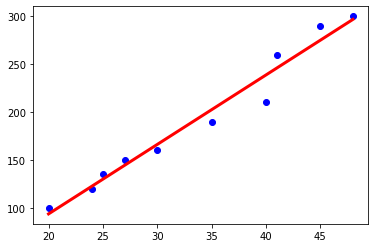

In [49]:
import matplotlib.pyplot as plt


plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red',linewidth=3)
plt.show()

<font size="4">Limitation of linear regression</font>

In [50]:
# > x=seq(-10,9,by=1)
# > y=x^2+x-33
# > newdat=data.frame(x,y)
# > newdat

x_dat = [i for i in range(-10,10)]
y_dat = [i**2+i-33 for i in x_dat]
new_dat = pd.DataFrame(zip(x_dat,y_dat), columns=["x","y"])
new_dat

,x,y
0,-10,57
1,-9,39
2,-8,23
3,-7,9
4,-6,-3
5,-5,-13
6,-4,-21
7,-3,-27
8,-2,-31
9,-1,-33


In [51]:
# > mymod = lm(y~x,newdat)

model = LinearRegression()
x = new_dat[["x"]]
y = new_dat["y"]
model.fit(x, y)

LinearRegression()

In [52]:
# > summary(mymod)
r_sq = model.score(x,y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.0
intercept: 4.6795556864458966e-17
slope: [9.35911137e-17]


In [53]:
# > yhat = predict(mymod,dat)
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")
print(f"input response:\n{y}")

predicted response:
[-8.89115580e-16 -7.95524467e-16 -7.01933353e-16 -6.08342239e-16
 -5.14751126e-16 -4.21160012e-16 -3.27568898e-16 -2.33977784e-16
 -1.40386671e-16 -4.67955569e-17  4.67955569e-17  1.40386671e-16
  2.33977784e-16  3.27568898e-16  4.21160012e-16  5.14751126e-16
  6.08342239e-16  7.01933353e-16  7.95524467e-16  8.89115580e-16]
input response:
0     57
1     39
2     23
3      9
4     -3
5    -13
6    -21
7    -27
8    -31
9    -33
10   -33
11   -31
12   -27
13   -21
14   -13
15    -3
16     9
17    23
18    39
19    57
Name: y, dtype: int64


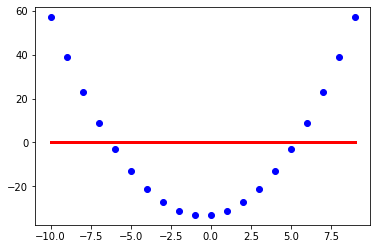

In [54]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red',linewidth=3)

plt.show()

<font size="4">Multiple predictors and interpreting model coefficients</font>

In [99]:
# > y=c(100,120,135,150,160,190,210,260,290,300)
# > AGE=c(20, 24, 25,27,30,35,40,41,45,48)
# > BMI=c(40,45,24,20,26,28,21,24,20,25)
# > dat=data.frame(y,AGE,BMI)

y=[100,120,135,150,160,190,210,260,290,300]
AGE=[20, 24, 25,27,30,35,40,41,45,48]
BMI=[40,45,24,20,26,28,21,24,20,25]
dat=pd.DataFrame(zip(y,AGE,BMI),columns=["y", "AGE", "BMI"])
dat

,y,AGE,BMI
0,100,20,40
1,120,24,45
2,135,25,24
3,150,27,20
4,160,30,26
5,190,35,28
6,210,40,21
7,260,41,24
8,290,45,20
9,300,48,25


In [100]:
# > mymod2=lm(y~AGE+BMI, dat)
X = dat[["AGE", "BMI"]]
y = dat["y"]

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [68]:
# > summary(mymod2)
r_sq = model.score(X,y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.966123026618024
intercept: -50.87064149189169
slope: [ 7.24726818 -0.01512244]


In [69]:
# > yhat = predict(mymod,dat)
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")
print(f"input response:\n{y}")

predicted response:
[ 93.46982457 122.3832851  129.94812451 144.50315063 166.15422054
 202.36031656 238.70251455 245.90441541 274.9539779  296.62017024]
input response:
0    100
1    120
2    135
3    150
4    160
5    190
6    210
7    260
8    290
9    300
Name: y, dtype: int64


In [104]:
# Using ols
from statsmodels.formula.api import ols

model = ols("y ~ AGE*BMI", dat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     59.26
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           7.52e-05
Time:                        15:43:21   Log-Likelihood:                -39.238
No. Observations:                  10   AIC:                             86.48
Df Residuals:                       6   BIC:                             87.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -88.7846     88.948     -0.998      0.3

/home/users/hwangzi/tools/anaconda3/envs/study/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<font size="4">ANOVA using linear model</font>
<br><font size="3">일원분산분석</font>

In [106]:
# > mydat=data.frame(y=c(100,90,105,83,78,95,93,79,85,90,70,72,81,
# +                      74,75),Group=factor(rep(c("mRNA1","mRNA2","mRNA3"),each=5)))

y = [100,90,105,83,78,95,93,79,85,90,70,72,81,74,75]
group = np.concatenate([([i]*5) for i in ["mRNA1","mRNA2","mRNA3"]], axis=0)

mydat = pd.DataFrame(zip(y,group), columns=["y","group"])
mydat

,y,group
0,100,mRNA1
1,90,mRNA1
2,105,mRNA1
3,83,mRNA1
4,78,mRNA1
5,95,mRNA2
6,93,mRNA2
7,79,mRNA2
8,85,mRNA2
9,90,mRNA2


In [121]:
from statsmodels.formula.api import ols

# > my3 = lm(y~Group, data=mydat)
# > summary(my3)

model = ols("y ~ group", mydat).fit()
print(model.summary())

# sklearn LinearRegression() 사용 시, variable이 string이라서 오류

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     6.505
Date:                Tue, 14 Jun 2022   Prob (F-statistic):             0.0122
Time:                        17:30:16   Log-Likelihood:                -50.596
No. Observations:                  15   AIC:                             107.2
Df Residuals:                      12   BIC:                             109.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         91.2000      3.529     25.

/home/users/hwangzi/tools/anaconda3/envs/study/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [122]:
import statsmodels.api as sm

anova_table = sm.stats.anova_lm(model, typ=1) # typ 1 일원분산분석
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
group,2.0,810.133333,405.066667,6.505353,0.012199
Residual,12.0,747.200000,62.266667,NaN,NaN


In [110]:
# Intercept is mean of mRNA1's values
# group[T.mRNA2] is difference of mRNA1 mean and mRNA2 mean
# group[T.mRNA3] is difference of mRNA1 mean and mRNA3 mean

# F-statistic is affection of variables to y 
# Prob (F-statistic) is p-value (H0: my model is worse than model with just the intercept) -> p-value lower, variable have more affection

<font size="4">ANOVA using linear model</font>
<br><font size="3">이원분산분석</font>

In [117]:
# Group=factor(rep(paste("mRNA",1:3,sep=""),each=6))
# Block=factor(rep(paste("array",1:6,sep=""),3))
# y=c(100,90,105,83,78,93,95,93,79,85,90,102,88,85,87,83,89,75)
# md2<-data.frame(Group,Block,y)
# md2

group = np.concatenate([([i]*6) for i in ["mRNA1","mRNA2","mRNA3"]], axis=0)
block = [i for i in ["array1","array2","array3","array4","array5","array6"]]*3
y = [100,90,105,83,78,93,95,93,79,85,90,102,88,85,87,83,89,75]

md2 = pd.DataFrame(zip(group,block,y),columns=["Group","Block","y"])
md2

,Group,Block,y
0,mRNA1,array1,100
1,mRNA1,array2,90
2,mRNA1,array3,105
3,mRNA1,array4,83
4,mRNA1,array5,78
5,mRNA1,array6,93
6,mRNA2,array1,95
7,mRNA2,array2,93
8,mRNA2,array3,79
9,mRNA2,array4,85


In [124]:
# my5=lm(y~Group+Block,data=md2)

my5 = ols("y~Group+Block",md2).fit()
print(my5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                 -0.122
Method:                 Least Squares   F-statistic:                    0.7350
Date:                Tue, 14 Jun 2022   Prob (F-statistic):              0.649
Time:                        17:49:48   Log-Likelihood:                -59.155
No. Observations:                  18   AIC:                             134.3
Df Residuals:                      10   BIC:                             141.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          96.9444      5.788     

/home/users/hwangzi/tools/anaconda3/envs/study/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In [119]:
import statsmodels.api as sm

anova_table = sm.stats.anova_lm(my5, typ=2) # typ 2 이원분산분석
anova_table

,sum_sq,df,F,PR(>F)
Group,175.444444,2.0,1.163596,0.351301
Block,212.444444,5.0,0.563596,0.726427
Residual,753.888889,10.0,NaN,NaN
